In [35]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import matplotlib.pyplot as plt

In [16]:
px = web.get_data_yahoo('SPY','20150102','20171231')['Adj Close']

Date
2015-01-02    193.286972
2015-01-05    189.796265
2015-01-06    188.008591
2015-01-07    190.351379
2015-01-08    193.729202
2015-01-09    192.176727
2015-01-12    190.671295
2015-01-13    190.135025
2015-01-14    188.987122
2015-01-15    187.255875
2015-01-16    189.711594
2015-01-20    190.116165
2015-01-21    191.075897
2015-01-22    193.917374
2015-01-23    192.854156
2015-01-26    193.305786
2015-01-27    190.755997
2015-01-28    188.309677
2015-01-29    190.050339
2015-01-30    187.660492
2015-02-02    189.984467
2015-02-03    192.731873
2015-02-04    191.997986
2015-02-05    193.936188
2015-02-06    193.399887
2015-02-09    192.534286
2015-02-10    194.585419
2015-02-11    194.698303
2015-02-12    196.570694
2015-02-13    197.379837
                 ...    
2017-11-16    257.304779
2017-11-17    256.548645
2017-11-20    256.986420
2017-11-21    258.667816
2017-11-22    258.438995
2017-11-24    259.035919
2017-11-27    258.906616
2017-11-28    261.533173
2017-11-29    261.37

In [9]:
expiry = {'ESU2':datetime(2018,3,31),
         'ESZ2':datetime(2018,6,30)}
expiry = pd.Series(expiry)

In [14]:
np.random.seed(12347)
N = 200
walk = (np.random.randint(0,200,size=N) - 100) * 0.25
perturb = (np.random.randint(0,20,size=N) - 100) * 0.25
walk = walk.cumsum()

rng = pd.date_range(px.index[0],periods=len(px) + N,freq='B')
near = np.concatenate([px.values,px.values[-1] + walk])
far = np.concatenate([px.values,px.values[-1] + walk + perturb])
prices = pd.DataFrame({'ESU2':near,'ESZ2':far},index=rng)

In [20]:
prices.tail()

,ESU2,ESZ2
2018-08-24,296.109985,275.359985
2018-08-27,282.359985,262.109985
2018-08-28,290.359985,269.609985
2018-08-29,306.859985,283.609985
2018-08-30,286.859985,262.109985


移动相关系数与线性回归

C:\Users\wangxw\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=250).corr(other=<Series>)


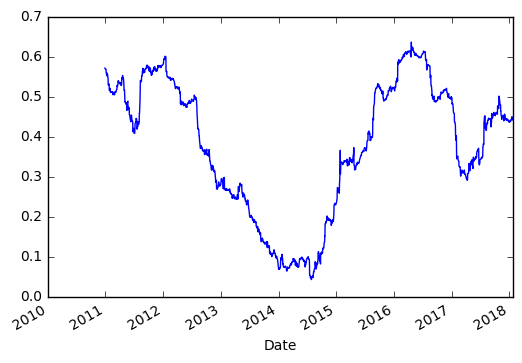

In [37]:
aapl = web.get_data_yahoo('AAPL','20100101')['Adj Close']
msft = web.get_data_yahoo('MSFT','20100101')['Adj Close']

aapl_rets = aapl.pct_change()
msft_rets = msft.pct_change()

pd.rolling_corr(aapl_rets,msft_rets,250).plot()
plt.show()

In [40]:
model = pd.ols(y=aapl_rets,x={'MSFT':msft_rets},window=250)

C:\Users\wangxw\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html
  if __name__ == '__main__':


In [41]:
model.beta

,MSFT,intercept
Date,,
2010-12-29,0.695687,0.001995
2010-12-30,0.695096,0.001967
2010-12-31,0.694758,0.001942
2011-01-03,0.694094,0.002068
2011-01-04,0.694840,0.002057
2011-01-05,0.694341,0.002091
2011-01-06,0.679719,0.002006
2011-01-07,0.676881,0.002083
2011-01-10,0.668771,0.002162


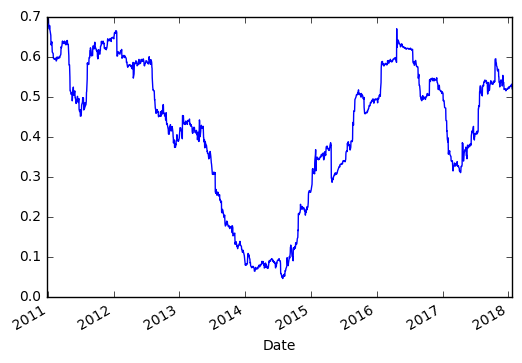

In [42]:
model.beta['MSFT'].plot()
plt.show()